In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import TTestIndPower

In [29]:
def perform_power_analysis(effect_size, alpha, nobs1, desired_power, sample_sizes=None):
    """
    –í—ã–ø–æ–ª–Ω—è–µ—Ç –∞–Ω–∞–ª–∏–∑ –º–æ—â–Ω–æ—Å—Ç–∏ –∏ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ—Ç –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–æ—â–Ω–æ—Å—Ç–∏ –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ –≤—ã–±–æ—Ä–∫–∏.
    
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
      effect_size: –†–∞–∑–º–µ—Ä —ç—Ñ—Ñ–µ–∫—Ç–∞ (Cohen's d)
      alpha: –£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏
      nobs1: –†–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏ –¥–ª—è –≥—Ä—É–ø–ø—ã A (–ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è —Ä–∞–≤–µ–Ω—Å—Ç–≤–æ –≥—Ä—É–ø–ø)
      desired_power: –ñ–µ–ª–∞–µ–º–∞—è –º–æ—â–Ω–æ—Å—Ç—å —Ç–µ—Å—Ç–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, 0.8 –¥–ª—è 80%)
      sample_sizes: (–û–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ) –º–∞—Å—Å–∏–≤ –∑–Ω–∞—á–µ–Ω–∏–π —Ä–∞–∑–º–µ—Ä–∞ –≤—ã–±–æ—Ä–∫–∏ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–∞.
                    –ï—Å–ª–∏ –Ω–µ –∑–∞–¥–∞–Ω, –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–∏–∞–ø–∞–∑–æ–Ω –æ—Ç 100 –¥–æ 2000 —Å —à–∞–≥–æ–º 50.
    """
    analysis = TTestIndPower()
    
    current_power = analysis.power(effect_size=effect_size, nobs1=nobs1, alpha=alpha, ratio=1.0)
    print(f"–ú–æ—â–Ω–æ—Å—Ç—å —Ç–µ—Å—Ç–∞ –ø—Ä–∏ n = {nobs1}: {current_power:.4f}")
    
    required_n = analysis.solve_power(effect_size=effect_size, power=desired_power, alpha=alpha, ratio=1.0)
    print(f"–¢—Ä–µ–±—É–µ–º—ã–π —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏ –Ω–∞ –≥—Ä—É–ø–ø—É –¥–ª—è –º–æ—â–Ω–æ—Å—Ç–∏ {desired_power*100:.0f}%: {required_n:.0f}")
    
    if sample_sizes is None:
        sample_sizes = np.arange(100, 2000, 50)
    
    powers = analysis.power(effect_size=effect_size, nobs1=sample_sizes, alpha=alpha, ratio=1.0)
    
    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, powers, marker='o', linestyle='-', label='–ú–æ—â–Ω–æ—Å—Ç—å —Ç–µ—Å—Ç–∞')
    plt.axhline(desired_power, color='red', linestyle='--', label=f'–ñ–µ–ª–∞–µ–º–∞—è –º–æ—â–Ω–æ—Å—Ç—å: {desired_power}')
    plt.xlabel('–†–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏ –Ω–∞ –≥—Ä—É–ø–ø—É')
    plt.ylabel('–ú–æ—â–Ω–æ—Å—Ç—å —Ç–µ—Å—Ç–∞')
    plt.title("–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–æ—â–Ω–æ—Å—Ç–∏ —Ç–µ—Å—Ç–∞ –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ –≤—ã–±–æ—Ä–∫–∏")
    plt.legend()
    plt.grid(True)
    plt.show()

In [30]:
np.random.seed(42)

In [31]:
n_A, n_B = 1000, 1000
group_A = np.random.normal(loc=50, scale=10, size=n_A)
group_B = np.random.normal(loc=55, scale=10, size=n_B)


In [32]:
def bootstrap_statistic(data, statistic_func=np.mean, n_bootstrap=10000, random_state=42):
    rng = np.random.default_rng(random_state)
    boot_stats = np.empty(n_bootstrap)
    n = len(data)
    for i in range(n_bootstrap):
        sample = rng.choice(data, size=n, replace=True)
        boot_stats[i] = statistic_func(sample)
    return boot_stats

In [33]:
def percentile_ci(boot_stats, ci=95):
    lower = np.percentile(boot_stats, (100-ci)/2)
    upper = np.percentile(boot_stats, 100 - (100-ci)/2)
    return lower, upper


In [34]:
boot_means_A = bootstrap_statistic(group_A, np.mean)
boot_means_B = bootstrap_statistic(group_B, np.mean)

In [35]:
ci_A = percentile_ci(boot_means_A)
ci_B = percentile_ci(boot_means_B)

In [36]:
boot_diff = boot_means_B - boot_means_A
ci_diff = percentile_ci(boot_diff)

–î–≤—É—Ö—Å—Ç–æ—Ä–æ–Ω–Ω–∏–π —Ç–µ—Å—Ç: –±–µ—Ä–µ–º –º–∏–Ω–∏–º–∞–ª—å–Ω—É—é –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç boot_diff <= 0 –∏–ª–∏ boot_diff >= 0 –∏ —É–º–Ω–æ–∂–∞–µ–º –Ω–∞ 2

In [37]:
p_value_boot = 2 * min(np.mean(boot_diff <= 0), np.mean(boot_diff >= 0))

In [38]:
def cohen_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2) / (nx+ny-2))
    return (np.mean(x) - np.mean(y)) / pooled_std

In [39]:
effect_size = cohen_d(group_B, group_A)

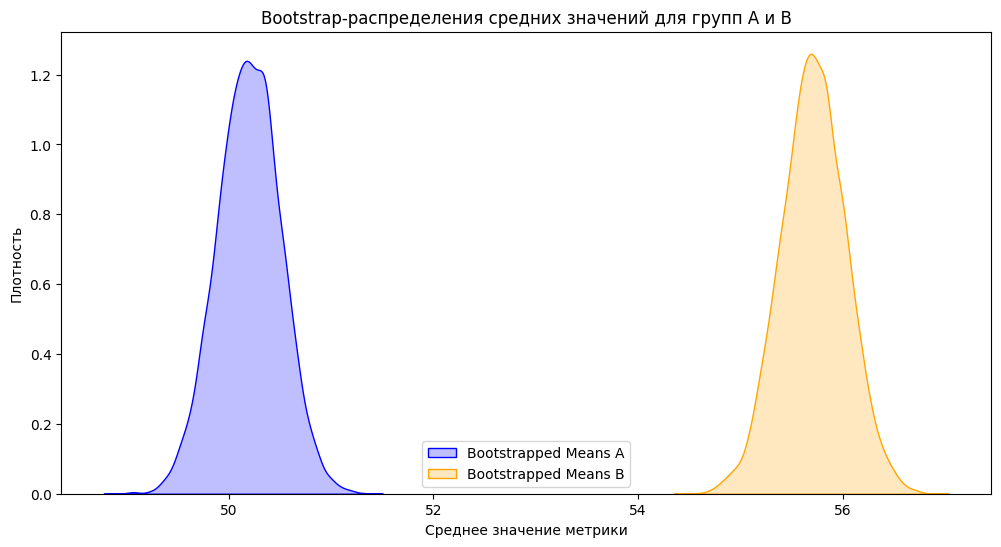

In [40]:
plt.figure(figsize=(12, 6))
sns.kdeplot(boot_means_A, label='Bootstrapped Means A', fill=True, color='blue')
sns.kdeplot(boot_means_B, label='Bootstrapped Means B', fill=True, color='orange')
plt.xlabel('–°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏')
plt.ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å')
plt.title('Bootstrap-—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –≥—Ä—É–ø–ø A –∏ B')
plt.legend()
plt.show()

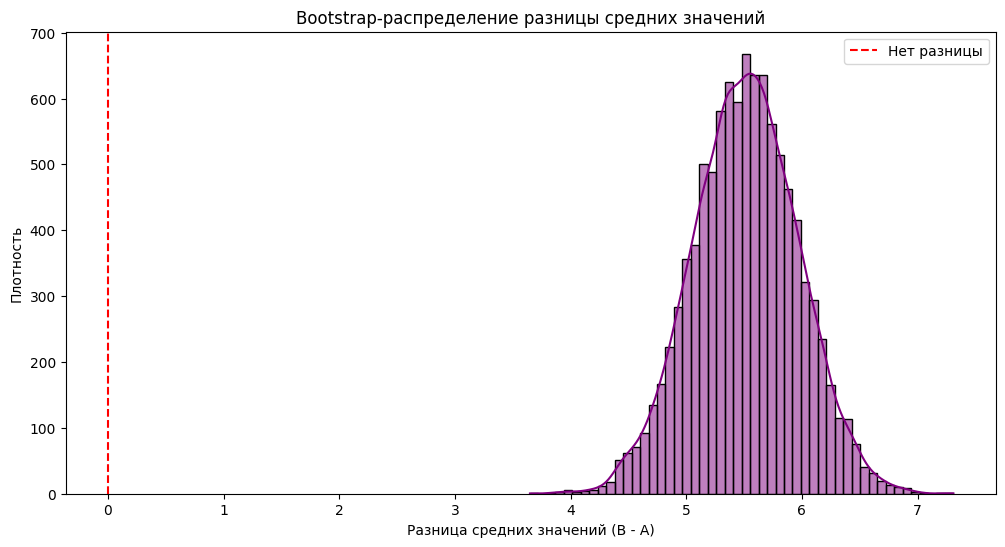

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(boot_diff, bins=50, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='dashed', label='–ù–µ—Ç —Ä–∞–∑–Ω–∏—Ü—ã')
plt.xlabel('–†–∞–∑–Ω–∏—Ü–∞ —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π (B - A)')
plt.ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å')
plt.title('Bootstrap-—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–∞–∑–Ω–∏—Ü—ã —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π')
plt.legend()
plt.show()


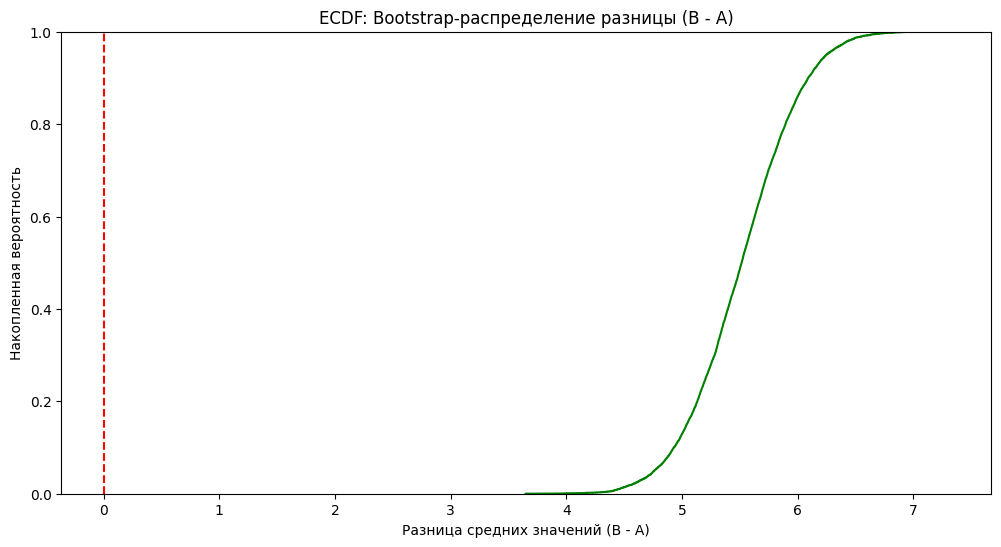

In [42]:
plt.figure(figsize=(12, 6))
sns.ecdfplot(boot_diff, color='green')
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel('–†–∞–∑–Ω–∏—Ü–∞ —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π (B - A)')
plt.ylabel('–ù–∞–∫–æ–ø–ª–µ–Ω–Ω–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å')
plt.title('ECDF: Bootstrap-—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–∞–∑–Ω–∏—Ü—ã (B - A)')
plt.show()

–ú–æ—â–Ω–æ—Å—Ç—å —Ç–µ—Å—Ç–∞ –ø—Ä–∏ n = 1000: 1.0000
–¢—Ä–µ–±—É–µ–º—ã–π —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏ –Ω–∞ –≥—Ä—É–ø–ø—É –¥–ª—è –º–æ—â–Ω–æ—Å—Ç–∏ 80%: 64


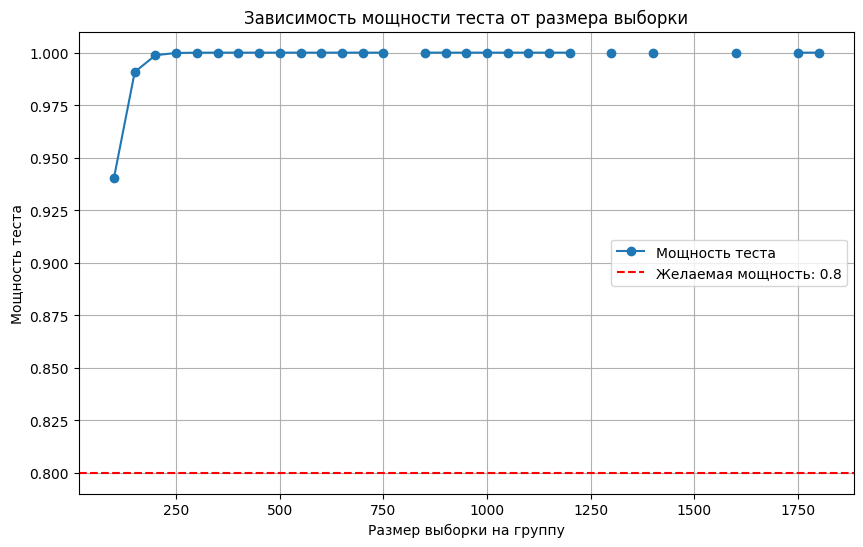

In [43]:
perform_power_analysis(effect_size=0.5, alpha=0.05, nobs1=1000, desired_power=0.8)

In [44]:
print("95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è Group A (—Å—Ä–µ–¥–Ω–µ–µ): [{:.2f}, {:.2f}]".format(ci_A[0], ci_A[1]))
print("95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è Group B (—Å—Ä–µ–¥–Ω–µ–µ): [{:.2f}, {:.2f}]".format(ci_B[0], ci_B[1]))
print("95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Ä–∞–∑–Ω–∏—Ü—ã (B - A): [{:.2f}, {:.2f}]".format(ci_diff[0], ci_diff[1]))
print("Bootstrap p-value: {:.4f}".format(p_value_boot))
print("Effect size (Cohen's d): {:.4f}".format(effect_size))

if ci_diff[0] > 0:
    print("üéâ –ì—Ä—É–ø–ø–∞ B –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ª—É—á—à–µ A!")
elif ci_diff[1] < 0:
    print("‚ùå –ì—Ä—É–ø–ø–∞ B –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —Ö—É–∂–µ A.")
else:
    print("ü§î –†–∞–∑–ª–∏—á–∏–µ –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ A –∏ B –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ.")

95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è Group A (—Å—Ä–µ–¥–Ω–µ–µ): [49.58, 50.80]
95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è Group B (—Å—Ä–µ–¥–Ω–µ–µ): [55.09, 56.33]
95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Ä–∞–∑–Ω–∏—Ü—ã (B - A): [4.62, 6.40]
Bootstrap p-value: 0.0000
Effect size (Cohen's d): 0.5580
üéâ –ì—Ä—É–ø–ø–∞ B –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ª—É—á—à–µ A!
